In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
data_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
data_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
data_submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [4]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print(data_train.shape)
data_train.info()

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

In [6]:
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
print(data_test.shape)
data_test.info()

(1459, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 1

<Axes: >

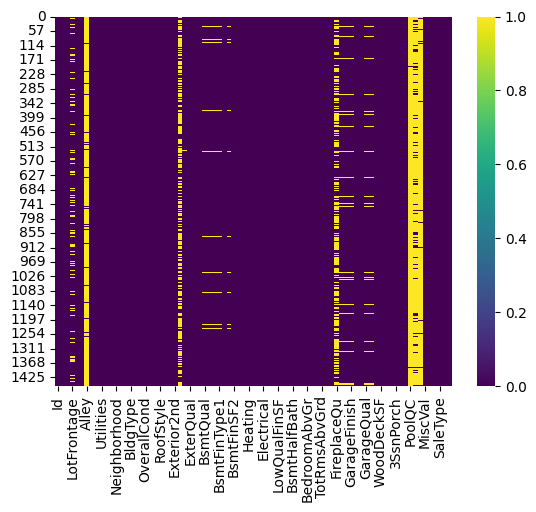

In [8]:
sns.heatmap(data=data_train.isnull(), cmap='viridis')

<Axes: >

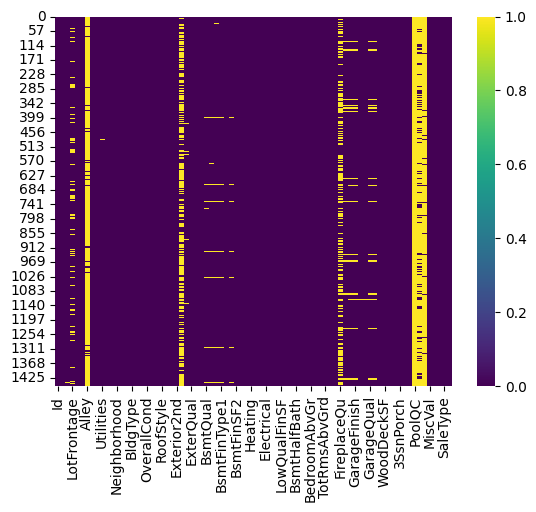

In [9]:
sns.heatmap(data=data_test.isnull(), cmap='viridis')

<Axes: >

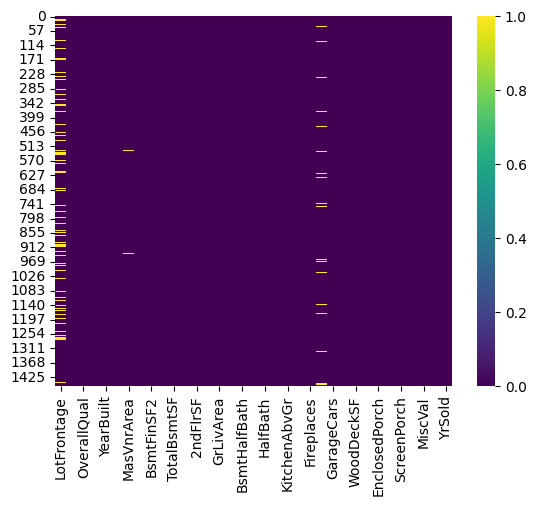

In [10]:
sns.heatmap(data=data_train.drop(['Id', 'MSSubClass', 'SalePrice'], axis=1).select_dtypes(exclude='object').isnull(), cmap='viridis')

In [11]:
data_train.drop(['Id', 'MSSubClass', 'SalePrice'], axis=1).select_dtypes(exclude='object').isnull().sum()

LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

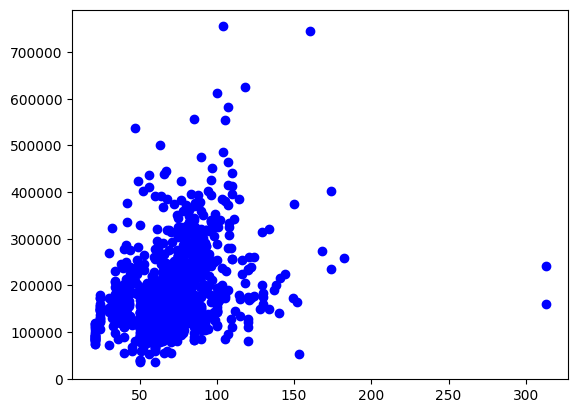

In [12]:
plt.scatter(x=data_train.LotFrontage, y=data_train.SalePrice, c='b')

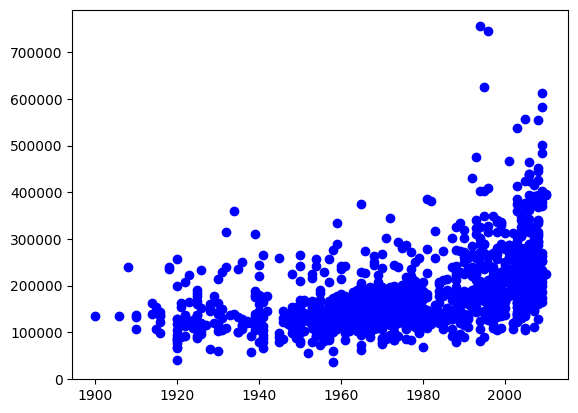

In [13]:
plt.scatter(x=data_train.GarageYrBlt, y=data_train.SalePrice, c='b')

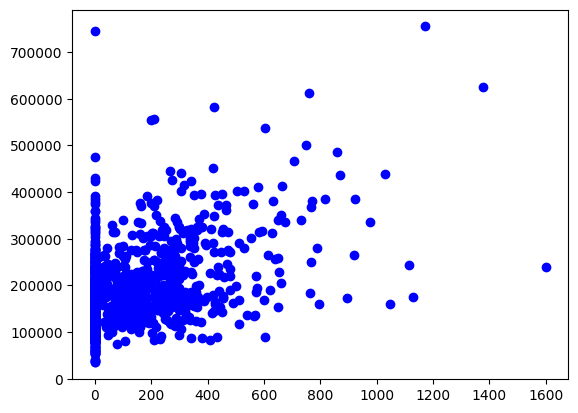

In [14]:
plt.scatter(x=data_train.MasVnrArea, y=data_train.SalePrice, c='b')

<Axes: >

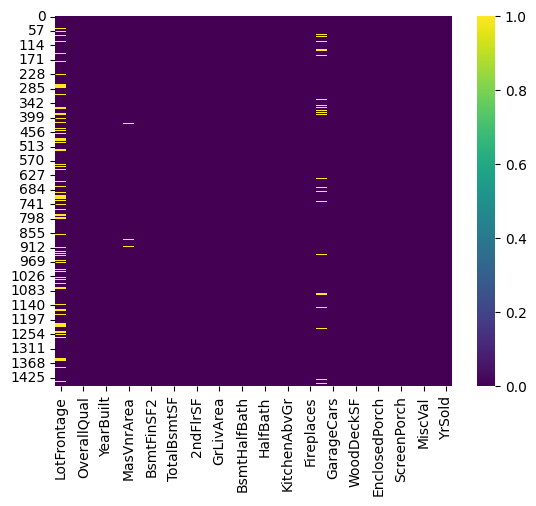

In [15]:
sns.heatmap(data=data_test.drop(['Id', 'MSSubClass'], axis=1).select_dtypes(exclude='object').isnull(), cmap='viridis')

In [16]:
data_test.drop(['Id', 'MSSubClass'], axis=1).select_dtypes(exclude='object').isnull().sum()

LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

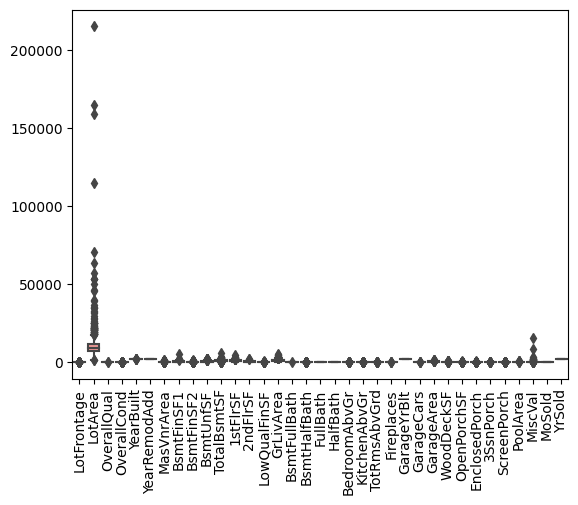

In [17]:
sns.boxplot(data=data_train.drop(['MSSubClass', 'Id', 'SalePrice'], axis=1).select_dtypes(exclude='object'))
plt.xticks(rotation=90)
plt.show()

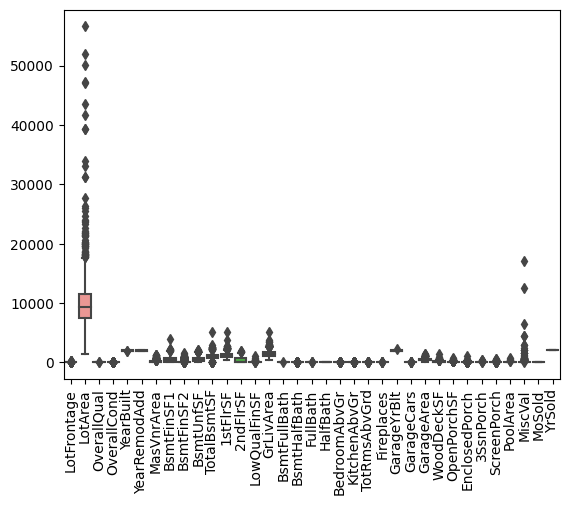

In [18]:
sns.boxplot(data=data_test.drop(['MSSubClass', 'Id'], axis=1).select_dtypes(exclude='object'))
plt.xticks(rotation=90)
plt.show()

In [19]:
numeric_data_labels_train = data_train.drop(['MSSubClass', 'Id', 'SalePrice'], axis=1).select_dtypes(exclude='object').keys().tolist()
numeric_data_labels_test = data_test.drop(['MSSubClass', 'Id'], axis=1).select_dtypes(exclude='object').keys().tolist()

data_train = data_train.apply(lambda x: x.fillna(x.mean()) if x.name in numeric_data_labels_train else x)
data_train = data_train.apply(lambda x: stats.zscore(x) if x.name in numeric_data_labels_train else x)

data_test = data_test.apply(lambda x: x.fillna(x.mean()) if x.name in numeric_data_labels_test else x)
data_test = data_test.apply(lambda x: stats.zscore(x) if x.name in numeric_data_labels_test else x)

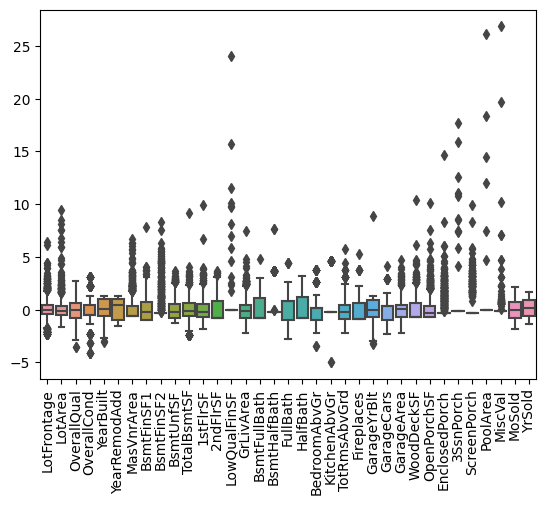

In [20]:
sns.boxplot(data=data_test.drop(['MSSubClass', 'Id'], axis=1).select_dtypes(exclude='object'))
plt.xticks(rotation=90)
plt.show()

In [21]:
outliers_test = data_test.loc[(data_test.BsmtFinSF1 > 5) 
                                | (data_test.TotalBsmtSF > 5) 
                                | (data_test['1stFlrSF'] > 5)
                                | (data_test.LowQualFinSF > 10) 
                                | (data_test.GrLivArea > 6) 
                                | (data_test.BsmtHalfBath > 2) 
                                | (data_test.KitchenAbvGr > 3) 
                                | (data_test.KitchenAbvGr < -3)
                                | (data_test.GarageYrBlt > 5)
                                | (data_test.WoodDeckSF > 8)
                                | (data_test.EnclosedPorch > 10)
                                | (data_test['3SsnPorch'] > 13)
                                | (data_test.MiscVal  > 8)].index

In [22]:
data_test.drop(outliers_test, axis=0, inplace=True)

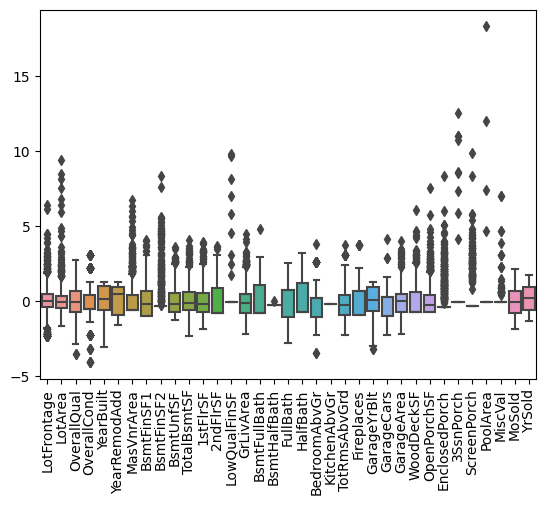

In [23]:
sns.boxplot(data=data_test.drop(['MSSubClass', 'Id'], axis=1).select_dtypes(exclude='object'))
plt.xticks(rotation=90)
plt.show()

(1285, 80)


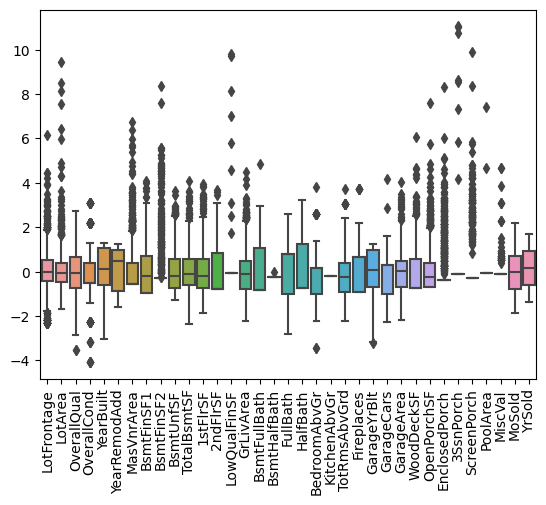

In [24]:
data_test.drop(data_test.loc[(data_test.MiscVal > 5) 
                             | (data_test.LowQualFinSF > 12) 
                             | (data_test['3SsnPorch'] >  12) 
                             | (data_test.EnclosedPorch > 10)
                             | (data_test.PoolArea > 10)].index, axis=0, inplace=True)
print(data_test.shape)
sns.boxplot(data=data_test.drop(['MSSubClass', 'Id'], axis=1).select_dtypes(exclude='object'))
plt.xticks(rotation=90)
plt.show()

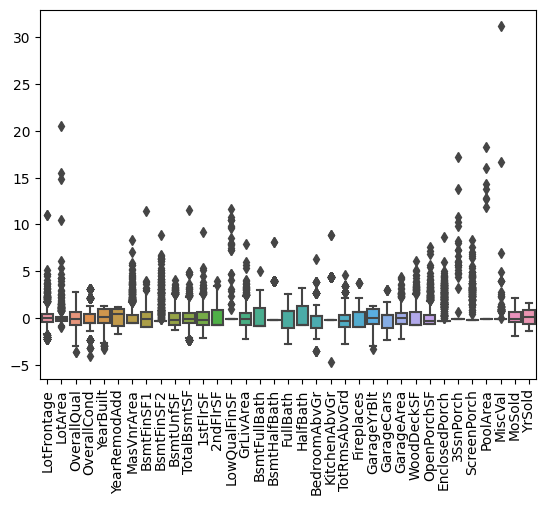

In [25]:
sns.boxplot(data=data_train.drop(['MSSubClass', 'Id', 'SalePrice'], axis=1).select_dtypes(exclude='object'))
plt.xticks(rotation=90)
plt.show()

In [26]:
outliers_train = data_train.loc[(data_train.LotFrontage > 10) 
                                | (data_train.LotArea > 8) 
                                | (data_train.BsmtFinSF1 > 5) 
                                | (data_train.TotalBsmtSF > 6) 
                                | (data_train['1stFlrSF'] > 6) 
                                | (data_train.BsmtHalfBath > 2) 
                                | (data_train.KitchenAbvGr > 2) | (data_train.KitchenAbvGr < -2) 
                                | (data_train.EnclosedPorch > 7) 
                                | (data_train['3SsnPorch'] > 15) 
                                | (data_train.MiscVal > 10)].index

In [27]:
data_train.drop(outliers_train, axis=0, inplace=True)

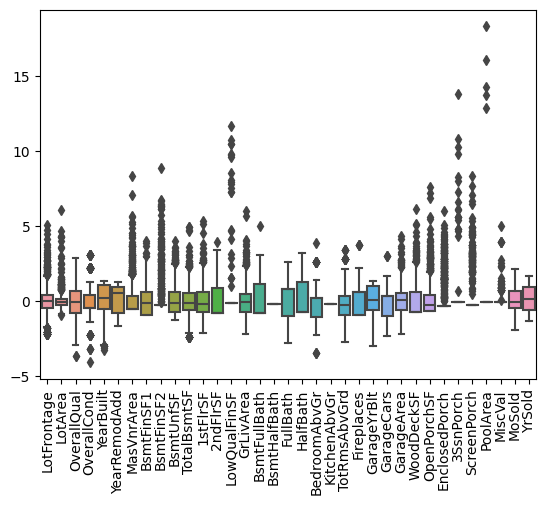

In [28]:
sns.boxplot(data=data_train.drop(['MSSubClass', 'Id', 'SalePrice'], axis=1).select_dtypes(exclude='object'))
plt.xticks(rotation=90)
plt.show()

In [29]:
data_train.drop(['MSSubClass', 'Id', 'SalePrice'], axis=1).select_dtypes(exclude='object').var()

LotFrontage      8.497494e-01
LotArea          3.055416e-01
OverallQual      1.013108e+00
OverallCond      9.331085e-01
YearBuilt        1.004977e+00
YearRemodAdd     1.002961e+00
MasVnrArea       9.970953e-01
BsmtFinSF1       9.018574e-01
BsmtFinSF2       1.000468e+00
BsmtUnfSF        9.845108e-01
TotalBsmtSF      8.616834e-01
1stFlrSF         9.442418e-01
2ndFlrSF         9.921722e-01
LowQualFinSF     9.839006e-01
GrLivArea        9.567500e-01
BsmtFullBath     9.644980e-01
BsmtHalfBath     0.000000e+00
FullBath         9.819166e-01
HalfBath         9.589196e-01
BedroomAbvGr     8.620755e-01
KitchenAbvGr     3.083847e-33
TotRmsAbvGrd     9.243972e-01
Fireplaces       9.758302e-01
GarageYrBlt      1.007955e+00
GarageCars       9.787920e-01
GarageArea       9.864085e-01
WoodDeckSF       9.937836e-01
OpenPorchSF      1.007110e+00
EnclosedPorch    9.449879e-01
3SsnPorch        7.934533e-01
ScreenPorch      1.019063e+00
PoolArea         8.860484e-01
MiscVal          1.166188e-01
MoSold    

In [30]:
data_test.drop(['MSSubClass', 'Id'], axis=1).select_dtypes(exclude='object').var()

LotFrontage      1.008507
LotArea          0.954677
OverallQual      1.031109
OverallCond      0.985970
YearBuilt        1.035964
YearRemodAdd     1.005106
MasVnrArea       1.039020
BsmtFinSF1       0.965619
BsmtFinSF2       0.918216
BsmtUnfSF        0.946278
TotalBsmtSF      0.913212
1stFlrSF         0.922791
2ndFlrSF         0.976358
LowQualFinSF     0.300557
GrLivArea        0.942001
BsmtFullBath     0.949404
BsmtHalfBath     0.000052
FullBath         0.950463
HalfBath         0.971411
BedroomAbvGr     0.854335
KitchenAbvGr     0.000000
TotRmsAbvGrd     0.858096
Fireplaces       0.970109
GarageYrBlt      0.999608
GarageCars       0.917879
GarageArea       0.930183
WoodDeckSF       0.886805
OpenPorchSF      0.905569
EnclosedPorch    0.839158
3SsnPorch        0.482548
ScreenPorch      1.024670
PoolArea         0.060867
MiscVal          0.097414
MoSold           0.992282
YrSold           0.996304
dtype: float64

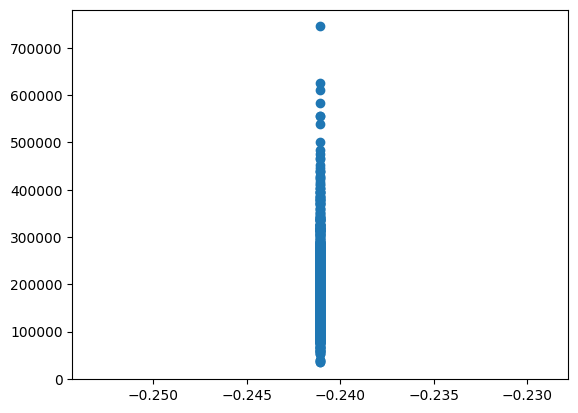

In [31]:
plt.scatter(data_train.BsmtHalfBath, data_train.SalePrice)

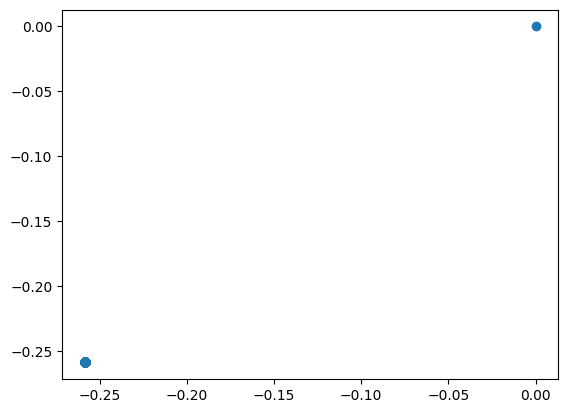

In [32]:
plt.scatter(data_test.BsmtHalfBath, data_test.BsmtHalfBath)

In [33]:
data_test.BsmtHalfBath.value_counts()
#Drop BsmtHalfBath

BsmtHalfBath
-0.258526    1284
 0.000000       1
Name: count, dtype: int64

In [34]:
data_train.MiscVal.value_counts()

MiscVal
-0.087688    1266
 0.718840      10
 3.944952       4
 0.920472       4
 1.323736       4
 0.819656       4
 1.122104       3
 2.331896       2
 1.525368       1
 0.880146       1
 0.618024       1
 2.533528       1
 0.021193       1
 1.162430       1
 1.041451       1
 2.735160       1
 2.231080       1
 4.953112       1
Name: count, dtype: int64

In [35]:
data_test.MiscVal.value_counts()
#Drop MiscVal

MiscVal
-0.092244    1251
 0.542082       6
 2.286478       3
 0.621373       3
 0.859245       3
 0.700664       3
 3.079386       3
 0.938536       2
 4.665200       2
 0.637231       1
 0.629302       1
 1.493571       1
 3.872293       1
 1.097117       1
 1.334990       1
 0.684806       1
 0.383501       1
 0.573799       1
Name: count, dtype: int64

In [36]:
data_train.PoolArea.value_counts()

PoolArea
-0.068692     1302
 16.065342       1
 14.272672       1
 13.749810       1
 12.853474       1
 18.306180       1
Name: count, dtype: int64

In [37]:
data_test.PoolArea.value_counts()
#Drop PoolArea

PoolArea
-0.057227    1283
 4.666997       1
 7.422795       1
Name: count, dtype: int64

In [38]:
data_train.drop(['BsmtHalfBath', 'PoolArea', 'MiscVal', '3SsnPorch'], axis=1, inplace=True)
data_test.drop(['BsmtHalfBath', 'PoolArea', 'MiscVal', '3SsnPorch'], axis=1, inplace=True)

(1307, 77)


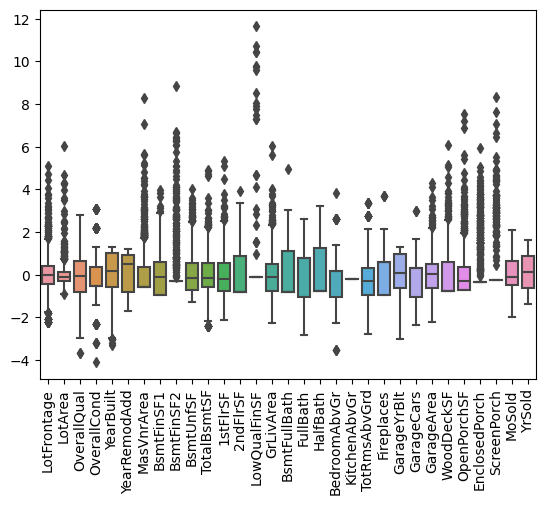

In [39]:
print(data_train.shape)
sns.boxplot(data=data_train.drop(['MSSubClass', 'Id', 'SalePrice'], axis=1).select_dtypes(exclude='object'))
plt.xticks(rotation=90)
plt.show()

(1285, 76)


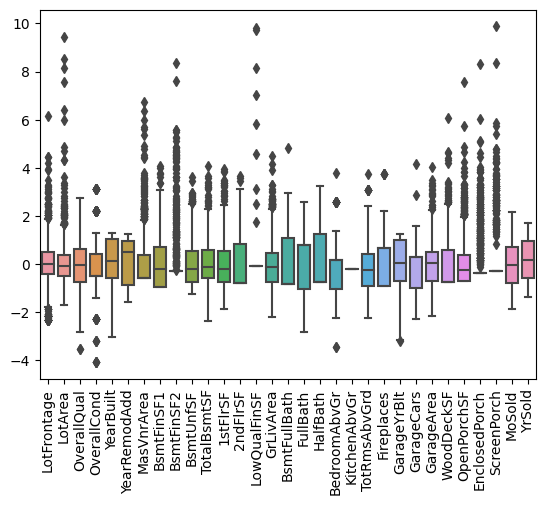

In [40]:
print(data_test.shape)
sns.boxplot(data=data_test.drop(['MSSubClass', 'Id'], axis=1).select_dtypes(exclude='object'))
plt.xticks(rotation=90)
plt.show()

In [41]:
corr_matrix_train = data_train.drop(['Id', 'SalePrice', 'MSSubClass'], axis=1).select_dtypes(exclude='object').corr()
corr_matrix_train = np.where(corr_matrix_train >= 0.9, corr_matrix, np.nan)

NameError: name 'corr_matrix' is not defined

In [ ]:
sns.heatmap(data=corr_matrix_train, annot=True)
plt.show()

In [ ]:
corr_matrix_test = data_test.drop(['Id', 'MSSubClass'], axis=1).select_dtypes(exclude='object').corr()
corr_matrix_test = np.where(corr_matrix >= 0.9, corr_matrix_test, np.nan)

In [ ]:
sns.heatmap(data=corr_matrix_test, annot=True)
plt.show()

In [ ]:
data_train.drop(['Id', 'MSSubClass'], axis=1).select_dtypes(exclude='object').corr()['SalePrice']

In [ ]:
data_train.KitchenAbvGr.value_counts()

In [ ]:
data_test.drop('KitchenAbvGr', axis=1, inplace=True)

In [ ]:
sns.boxplot(data=data_train.drop(['SalePrice', 'Id', 'MSSubClass'], axis=1))
plt.xticks(rotation=90)
plt.show()

In [ ]:
sns.histplot(data=data_train.SalePrice)

In [ ]:
data_train.SalePrice = np.log1p(data_train.SalePrice)
sns.histplot(data=data_train.SalePrice)

In [ ]:
data_train.select_dtypes(include='object').isnull().sum()

In [ ]:
data_test.select_dtypes(include='object').isnull().sum()

In [ ]:
data_train = data_train.drop(['Alley'], axis=1)

In [ ]:
data_test.drop(['Alley', 'MiscFeature', 'PoolQC'], axis=1, inplace=True)

In [ ]:
data_train.select_dtypes(include='object').value_counts().unique().sum()

In [ ]:
OrdinalEncoder(categories=data_train.Fence.unique())